In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
# loading the data from csv file to a Pandas DataFrame
sales_dataset = pd.read_csv('US_Regional_Sales_Data.csv')

In [50]:
# first 5 rows of the dataframe
sales_dataset.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [51]:
# number of rows and columns
sales_dataset.shape

(7991, 16)

In [52]:
# getting some informations about the dataset
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [53]:
# checking for missing values
sales_dataset.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

In [54]:
# statistical Measures of the dataset
sales_dataset.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000


In [55]:
#columns name
sales_dataset.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price'],
      dtype='object')

In [56]:
# program for calculate all the statistical parameter
def summary(sales_dataset):
    print(f'data shape : {sales_dataset.shape}')
    sum=pd.DataFrame(sales_dataset.dtypes,columns=['data type'])
    sum["Missing"]=sales_dataset.isnull().sum()
    sum["%Missing"]=(sales_dataset.isnull().sum()/len(sales_dataset))*100
    sum['#unique']=sales_dataset.nunique().values
    desc=pd.DataFrame(sales_dataset.describe(include="all").transpose())
    sum['min']=desc['min'].values
    sum['max']=desc['max'].values
    sum['first value']=sales_dataset.loc[0].values
    sum['second value']=sales_dataset.loc[1].values
    sum['Third value']=sales_dataset.loc[2].values
    
    return sum

In [57]:
summary(sales_dataset)

data shape : (7991, 16)


,data type,Missing,%Missing,#unique,min,max,first value,second value,Third value
OrderNumber,object,0,0.0,7991,NaN,NaN,SO - 000101,SO - 000102,SO - 000103
Sales Channel,object,0,0.0,4,NaN,NaN,In-Store,Online,Distributor
WarehouseCode,object,0,0.0,6,NaN,NaN,WARE-UHY1004,WARE-NMK1003,WARE-UHY1004
ProcuredDate,object,0,0.0,11,NaN,NaN,31/12/17,31/12/17,31/12/17
OrderDate,object,0,0.0,945,NaN,NaN,31/5/18,31/5/18,31/5/18
ShipDate,object,0,0.0,966,NaN,NaN,14/6/18,22/6/18,21/6/18
DeliveryDate,object,0,0.0,966,NaN,NaN,19/6/18,2/7/18,1/7/18
CurrencyCode,object,0,0.0,1,NaN,NaN,USD,USD,USD
_SalesTeamID,int64,0,0.0,28,1.0,28.0,6,14,21
_CustomerID,int64,0,0.0,50,1.0,50.0,15,20,16


In [58]:
data = sales_dataset.drop(columns=['OrderNumber', 'CurrencyCode'])



In [59]:
data

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,21,16,213,16,1,0.050,781.22,"1,775.50"
3,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,9,41,339,29,1,0.075,121.94,234.5
7987,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,20,42,112,36,8,0.100,804,"1,072.00"


In [60]:
df=data.copy()
import numpy as np

In [61]:
#converting dates into numerical
df['ProcuredDate'] = df['ProcuredDate'].str.replace('[/-]', '', regex=True).astype(np.int64)
df['OrderDate'] = df['OrderDate'].str.replace('[/-]', '', regex=True).astype(np.int64)
df['ShipDate'] = df['ShipDate'].str.replace('[/-]', '', regex=True).astype(np.int64)
df['DeliveryDate'] = df['DeliveryDate'].str.replace('[/-]', '', regex=True).astype(np.int64)

In [62]:
df['Unit Cost'] = df['Unit Cost'].str.replace(',', '')
df['Unit Price'] = df['Unit Price'].str.replace(',', '')

In [63]:
#remove , to convert to numerical
df['Unit Cost'] = pd.to_numeric( df['Unit Cost'] )
df['Unit Price'] =pd.to_numeric(df['Unit Price'] )

In [64]:
df.dtypes

Sales Channel        object
WarehouseCode        object
ProcuredDate          int64
OrderDate             int64
ShipDate              int64
DeliveryDate          int64
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Cost           float64
Unit Price          float64
dtype: object

In [65]:
df.head()

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,311217,31518,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1
1,Online,WARE-NMK1003,311217,31518,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6
2,Distributor,WARE-UHY1004,311217,31518,21618,1718,21,16,213,16,1,0.050,781.22,1775.5
3,Wholesale,WARE-NMK1003,311217,31518,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9
4,Distributor,WARE-NMK1003,10418,31518,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4


In [66]:
# Identify the data types of the features

numerical_features = df.select_dtypes(include=['int', 'float']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [67]:
print(numerical_features)
print(categorical_features)

Index(['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price'],
      dtype='object')
Index(['Sales Channel', 'WarehouseCode'], dtype='object')


In [68]:
# Group numerical features
numerical_data = df[numerical_features]
numerical_summary = numerical_data.describe()
print("Numerical Features Summary:")
print(numerical_summary.T)

Numerical Features Summary:
                   count          mean           std      min       25%  \
ProcuredDate      7991.0  46200.263546  85249.441307  4219.00  10418.00   
OrderDate         7991.0  58852.886748  82346.017960  1119.00  11420.00   
ShipDate          7991.0  57129.123514  80434.397914  1119.00  11420.00   
DeliveryDate      7991.0  57233.706295  80403.804924  1119.00  11619.50   
_SalesTeamID      7991.0     14.384307      7.986086     1.00      8.00   
_CustomerID       7991.0     25.457014     14.414883     1.00     13.00   
_StoreID          7991.0    183.850081    105.903946     1.00     91.00   
_ProductID        7991.0     23.771743     13.526545     1.00     12.00   
Order Quantity    7991.0      4.525341      2.312631     1.00      3.00   
Discount Applied  7991.0      0.114394      0.085570     0.05      0.05   
Unit Cost         7991.0   1431.911513   1112.413063    68.68    606.12   
Unit Price        7991.0   2284.536504   1673.096364   167.50   1031.80 

In [69]:
# Group categorical features
categorical_data = df[categorical_features]
categorical_counts = categorical_data.nunique()
print("\nCategorical Features Counts:")
print(categorical_counts)


Categorical Features Counts:
Sales Channel    4
WarehouseCode    6
dtype: int64


In [70]:
print('Unique values of each features:\n')
for feature in categorical_data.columns:
    print(feature)
    print(categorical_data[feature].unique())

Unique values of each features:

Sales Channel
['In-Store' 'Online' 'Distributor' 'Wholesale']
WarehouseCode
['WARE-UHY1004' 'WARE-NMK1003' 'WARE-PUJ1005' 'WARE-XYS1001'
 'WARE-MKL1006' 'WARE-NBV1002']


In [71]:
# Calculate total sales for each order
df['Total Sales'] = df['Order Quantity'] * df['Unit Price']

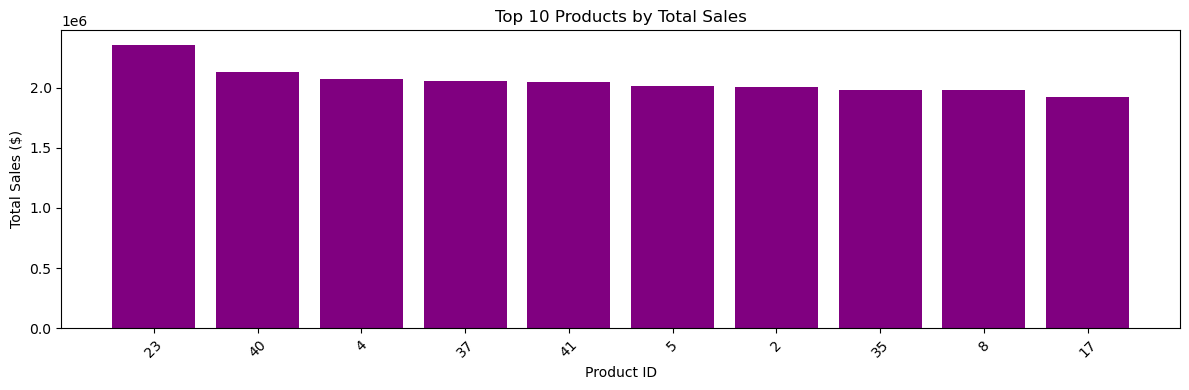

In [72]:
# Aggregate total sales by ProductID
product_sales_data = df.groupby('_ProductID')['Total Sales'].sum().reset_index()

# Sort the products by total sales and pick the top 10
top_products = product_sales_data.sort_values(by='Total Sales', ascending=False).head(10)

# Plotting the top 10 products by total sales
plt.figure(figsize=(12,4))
plt.bar(top_products['_ProductID'].astype(str), top_products['Total Sales'], color='purple')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['OrderDate_Year'] = df['OrderDate'].dt.year
df['OrderDate_Month'] = df['OrderDate'].dt.month
df['OrderDate_Day'] = df['OrderDate'].dt.day
df.head()

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Sales,OrderDate_Year,OrderDate_Month,OrderDate_Day
0,In-Store,WARE-UHY1004,311217,1970-01-01 00:00:00.000031518,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1,9815.5,1970,1,1
1,Online,WARE-NMK1003,311217,1970-01-01 00:00:00.000031518,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6,11818.8,1970,1,1
2,Distributor,WARE-UHY1004,311217,1970-01-01 00:00:00.000031518,21618,1718,21,16,213,16,1,0.050,781.22,1775.5,1775.5,1970,1,1
3,Wholesale,WARE-NMK1003,311217,1970-01-01 00:00:00.000031518,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9,18599.2,1970,1,1
4,Distributor,WARE-NMK1003,10418,1970-01-01 00:00:00.000031518,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4,14579.2,1970,1,1


In [76]:
# Select the specified columns
selected_columns = df[['Sales Channel', 'OrderDate_Year', 'Unit Price']]

# Group by 'Sales Channel' and 'OrderDate_Year' and then sum the values
grouped_year_unit_price = selected_columns.groupby(['Sales Channel', 'OrderDate_Year']).sum()

# Display the result
grouped_year_unit_price


,,Unit Price
Sales Channel,OrderDate_Year,
Distributor,1970,3201762.5
In-Store,1970,7487169.6
Online,1970,5544846.3
Wholesale,1970,2021952.8


In [82]:
# Convert the 'OrderDate' column to ordinal and then to numeric
df['OrderDate'] = pd.to_numeric(df['OrderDate'].apply(lambda x: x.toordinal()))

In [83]:
df


,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Sales,OrderDate_Year,OrderDate_Month,OrderDate_Day
0,1,4,311217,719163,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1,9815.5,1970,1,1
1,2,2,311217,719163,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6,11818.8,1970,1,1
2,0,4,311217,719163,21618,1718,21,16,213,16,1,0.050,781.22,1775.5,1775.5,1970,1,1
3,3,2,311217,719163,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9,18599.2,1970,1,1
4,0,2,10418,719163,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4,14579.2,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,1,0,26920,719163,7121,14121,9,41,339,29,1,0.075,121.94,234.5,234.5,1970,1,1
7987,2,2,26920,719163,2121,4121,14,29,202,3,6,0.050,1921.56,3202.6,19215.6,1970,1,1
7988,2,4,26920,719163,23121,26121,14,32,241,35,5,0.200,2792.76,3825.7,19128.5,1970,1,1
7989,2,2,26920,719163,20121,25121,20,42,112,36,8,0.100,804.00,1072.0,8576.0,1970,1,1


In [84]:
features_with_multiple_categories  = ['Sales Channel' , 'WarehouseCode']

In [85]:
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Perform label encoding on each categorical feature
for feature in features_with_multiple_categories:
    df[feature] = encoder.fit_transform(categorical_data[feature])

# Print the updated DataFrame
df.head()

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Sales,OrderDate_Year,OrderDate_Month,OrderDate_Day
0,1,4,311217,719163,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1,9815.5,1970,1,1
1,2,2,311217,719163,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6,11818.8,1970,1,1
2,0,4,311217,719163,21618,1718,21,16,213,16,1,0.050,781.22,1775.5,1775.5,1970,1,1
3,3,2,311217,719163,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9,18599.2,1970,1,1
4,0,2,10418,719163,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4,14579.2,1970,1,1


In [86]:
## Split training & testing data
X = df.drop(columns = 'Unit Price')
Y = df['Unit Price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 23)

In [87]:
print(X_train.dtypes)
print(Y_train.dtypes)


Sales Channel         int32
WarehouseCode         int32
ProcuredDate          int64
OrderDate             int64
ShipDate              int64
DeliveryDate          int64
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Cost           float64
Total Sales         float64
OrderDate_Year        int32
OrderDate_Month       int32
OrderDate_Day         int32
dtype: object
float64


In [112]:
# loading the Linear Regression model
model_LR = LinearRegression()

model_LR.fit(X_train, Y_train)


LinearRegression()

In [114]:
from sklearn import metrics
# prediction on training data
training_data_prediction =model_LR.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.922223713518975


In [116]:
# prediction on test data
test_data_prediction = model_LR.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.917981923777272


In [122]:
# Initialize and fit the DecisionTreeRegressor
model_DT = DecisionTreeRegressor(max_depth=5, min_samples_split=2, random_state=42)
model_DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [123]:
# prediction on training data
training_data_prediction_DT =model_DT.predict(X_train)

# R squared value
r2_train_DT = metrics.r2_score(Y_train, training_data_prediction_DT)
print('R squared value : ', r2_train_DT)

R squared value :  0.9374851474811429


In [125]:
# prediction on test data
test_data_prediction_DT =model_DT.predict(X_test)

# R squared value
r2_test_DT = metrics.r2_score(Y_test, test_data_prediction_DT)
print('R squared value : ', r2_test_DT)

R squared value :  0.9310191912673293


In [126]:
# Initialize and fit the RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators=10, random_state=42)
model_RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [127]:
# prediction on training data
training_data_prediction_RF =model_RF.predict(X_train)

# R squared value
r2_train_RF = metrics.r2_score(Y_train, training_data_prediction_RF)
print('R squared value : ', r2_train_RF)

R squared value :  0.9980128145270053


In [128]:
# prediction on test data
test_data_prediction_RF=model_RF.predict(X_test)

# R squared value
r2_test_RF = metrics.r2_score(Y_test, test_data_prediction_RF)
print('R squared value : ', r2_test_RF)

R squared value :  0.9901233220183294


In [129]:
#Fit KNN Model
model_knn = KNeighborsRegressor(n_neighbors=51)  # Initialize KNN regressor with 5 neighbors
model_knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=51)

In [130]:
# prediction on training data
training_data_prediction_knn =model_knn.predict(X_train)

# R squared value
r2_train_knn = metrics.r2_score(Y_train, training_data_prediction_knn)
print('R squared value : ', r2_train_knn)

R squared value :  0.5363420916521311


In [131]:
# prediction on test data
test_data_prediction_knn=model_knn.predict(X_test)

# R squared value
r2_test_knn = metrics.r2_score(Y_test, test_data_prediction_knn)
print('R squared value : ', r2_test_knn)

R squared value :  0.5088458388654804


In [134]:
#Fit SVR Model
model_svr = SVR(kernel='rbf', C=100)  
model_svr.fit(X_train, Y_train)  

SVR(C=100)

In [135]:
# prediction on training data
training_data_prediction_svr = model_svr.predict(X_train)

# R squared value
r2_train_svr = metrics.r2_score(Y_train, training_data_prediction_svr)
print('R squared value : ', r2_train_svr)

R squared value :  0.05028738906313657


In [136]:
# prediction on test data
test_data_prediction_svr=model_svr.predict(X_test)

# R squared value
r2_test_svr = metrics.r2_score(Y_test, test_data_prediction_svr)
print('R squared value : ', r2_test_svr)

R squared value :  0.04567449341298091


In [137]:
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor','KNN', 'SVR']
r2_train = [0.92, 0.94, 0.99, 0.53, 0.05]  # Training R2 scores
r2_test = [0.92, 0.93, 0.99, 0.50, 0.04]   # Test R2 scores

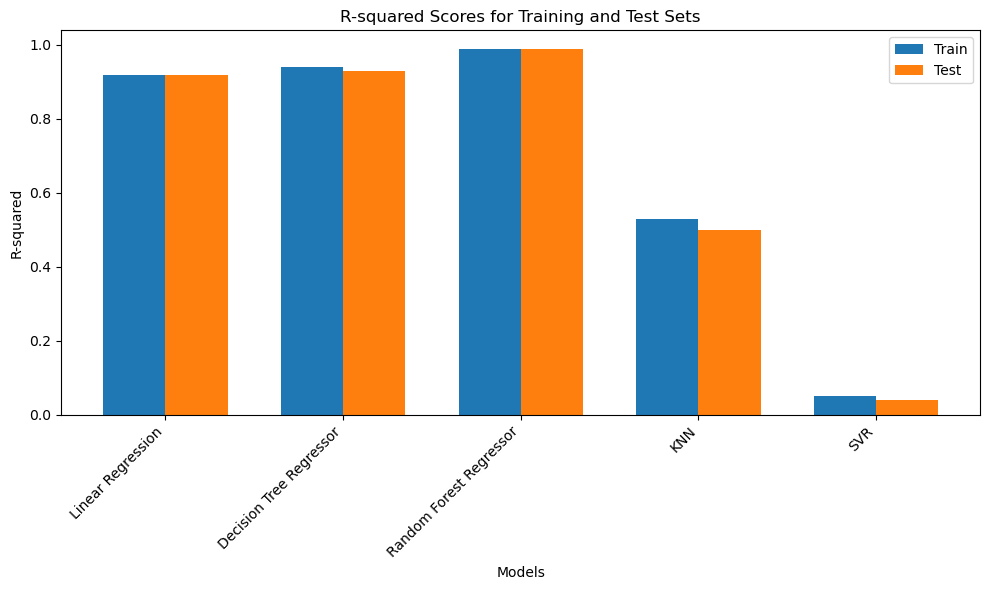

In [138]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index, r2_train, bar_width, label='Train')
bar2 = ax.bar(index + bar_width, r2_test, bar_width, label='Test')

ax.set_xlabel('Models')
ax.set_ylabel('R-squared')
ax.set_title('R-squared Scores for Training and Test Sets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()